In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [336]:
df = pd.read_csv(r"airline_passengers.csv" , index_col = 'Month' , parse_dates = True)
df.head(3)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [337]:
df.shape

(144, 1)

In [338]:
# to remove nan rows (double checking before proceeding further)
df = df.dropna()

In [339]:
df.shape

(144, 1)

In [340]:
df.index
# here we have frequency = None

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [341]:
# setting 'freq' value to 'MS' month start

df.index.freq = 'MS'

In [342]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

## <span style = 'background:lightblue'> 5. Holt-Winters methods</span>

In [343]:
span = 12 
alpha = 2/(span +1)

### <span style = 'background:#FFD580'>(i) Simple Exponential smoothing(SEM) method</span>

In [344]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [345]:
# STEP 1 : building model

model_sem = SimpleExpSmoothing(df['Thousands of Passengers'])

In [346]:
# STEP 2 : fitting model

fitted_model_sem = model_sem.fit(smoothing_level = alpha , optimized=False)

In [347]:
# STEP 3: fetching fitted values

fitted_model_sem.fittedvalues.head(5)
# since row 1 and 2 has repeating values therefore we need to shift the series upward by one.

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
Freq: MS, dtype: float64

In [348]:
# STEP 4 : shifting values by 1 upward

fitted_model_sem.fittedvalues.shift(-1).head(5)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
Freq: MS, dtype: float64

In [349]:
# tail values
fitted_model_sem.fittedvalues.shift(-1).tail(3)

Month
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, dtype: float64

In [350]:
# STEP 5 : 'SEM' - Simple exponential smoothing 

df['SEM12'] = np.round(fitted_model_sem.fittedvalues.shift(-1),2)

In [351]:
df.head(3)

,Thousands of Passengers,SEM12
Month,,
1949-01-01,112,112.00
1949-02-01,118,112.92
1949-03-01,132,115.86


### <span style = 'background :#FFD580'>(ii) Double Exponential Smoothing (DEM) Method.</span>

In [352]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [353]:
model_dem =  ExponentialSmoothing(df['Thousands of Passengers'],trend = 'add')
fitted_model_dem = model_dem.fit()
df['DES_add_12'] = np.round(fitted_model_dem.fittedvalues.shift(-1),2)

In [354]:
df.head(3)

,Thousands of Passengers,SEM12,DES_add_12
Month,,,
1949-01-01,112,112.00,114.10
1949-02-01,118,112.92,120.04
1949-03-01,132,115.86,134.00


In [355]:
# Plotting

df.columns

Index(['Thousands of Passengers', 'SEM12', 'DES_add_12'], dtype='object')

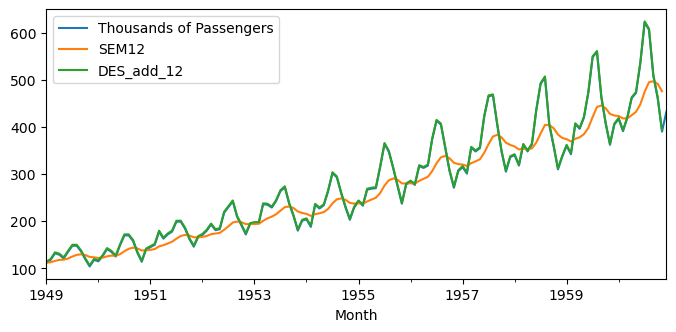

In [356]:
df[['Thousands of Passengers', 'SEM12', 'DES_add_12']].plot(figsize = (8,3.5))
plt.show()

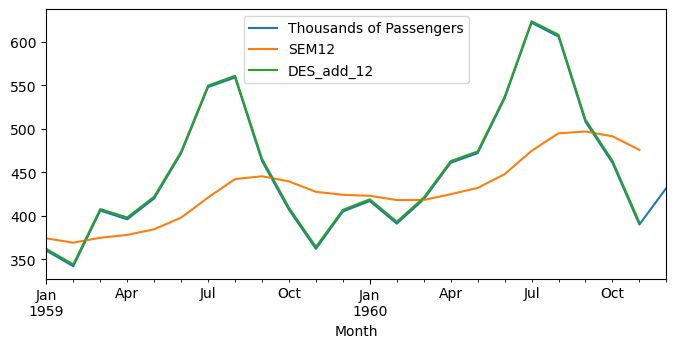

In [357]:
# Plotting last 24 months
df[['Thousands of Passengers', 'SEM12', 'DES_add_12']].iloc[-24:].plot(figsize = (8,3.5))
plt.show()

### <span style = 'background:#FFD580'>(iii) Triple Exponential smoothing(TEM) Method. </span>

In [358]:
df['TES_mul_12'] = np.round(ExponentialSmoothing(df['Thousands of Passengers'],
                                        trend = 'mul' , 
                                        seasonal = 'mul',
                                        seasonal_periods = 12).fit().fittedvalues,2)

C:\Users\aakas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [359]:
df.head(3)

,Thousands of Passengers,SEM12,DES_add_12,TES_mul_12
Month,,,,
1949-01-01,112,112.00,114.10,111.59
1949-02-01,118,112.92,120.04,118.84
1949-03-01,132,115.86,134.00,133.33


In [360]:
df.columns

Index(['Thousands of Passengers', 'SEM12', 'DES_add_12', 'TES_mul_12'], dtype='object')

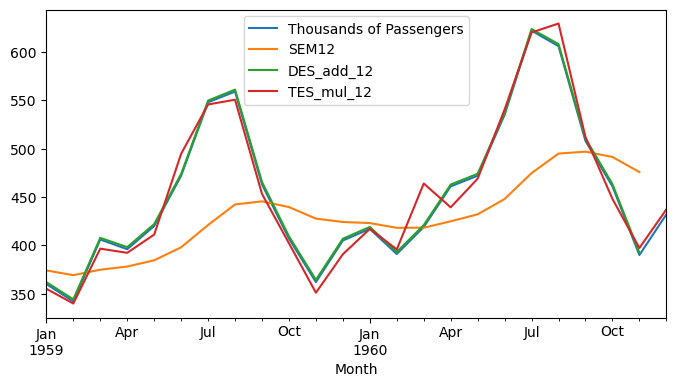

In [363]:
# Plotting last 24 months

df[['Thousands of Passengers', 'SEM12', 'DES_add_12','TES_mul_12']].iloc[-24:].plot(figsize =(8,4))  
plt.show()